In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
#import the dataset Churn_modelling.csv
dataset=pd.read_csv("Churn_Modelling.csv")

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#divide the dataset into X DataFrame and y DataFrame
# In X Dataframe ignore the columns like RowNumber,CustomerId,Surname and Exited
# in y DataFrame take the output column like Exited
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [4]:
#Create Dummy Variables for Geography and Gender and drop the first column
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)


In [5]:
#Concatenate the geography and gender to X-DataFrame 
X=pd.concat([X,geography,gender],axis=1)


In [6]:
#Delete the Geogryphy and Gender from X-DataFrame
X=X.drop(["Geography","Gender"],axis=1)


In [8]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)



In [9]:
#Implementing the Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [11]:
#Implementing the ANN by Keras
#Import the Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import PReLU,LeakyReLU,PReLU,ELU
from keras.layers import Dense
from keras.layers import Dropout



In [12]:
#Initialising the ANN
classifier=Sequential()


In [33]:
#Adding the first Hiden Layer along with the  inputLayer
classifier.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [34]:
#Adding 2nd Hidden Layer
classifier.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))

In [35]:
#Adding the Output Layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [36]:
#Compilng the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size=15,epochs=130)

Epoch 1/130
358/358 [==============================] - 2s 2ms/step - loss: 0.5818 - accuracy: 0.8498 - val_loss: 0.5033 - val_accuracy: 0.8478
Epoch 2/130
358/358 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8709 - val_loss: 0.4053 - val_accuracy: 0.8504
Epoch 3/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8722 - val_loss: 0.3932 - val_accuracy: 0.8387
Epoch 4/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8750 - val_loss: 0.3771 - val_accuracy: 0.8497
Epoch 5/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3169 - accuracy: 0.8718 - val_loss: 0.3796 - val_accuracy: 0.8444
Epoch 6/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8746 - val_loss: 0.3763 - val_accuracy: 0.8451
Epoch 7/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3111 - accuracy: 0.8726 - val_loss: 0.3802 - val_accuracy: 0.8451

Epoch 58/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2911 - accuracy: 0.8806 - val_loss: 0.3862 - val_accuracy: 0.8489
Epoch 59/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2913 - accuracy: 0.8824 - val_loss: 0.3921 - val_accuracy: 0.8448
Epoch 60/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.8806 - val_loss: 0.3875 - val_accuracy: 0.8478
Epoch 61/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2910 - accuracy: 0.8830 - val_loss: 0.3870 - val_accuracy: 0.8466
Epoch 62/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2913 - accuracy: 0.8821 - val_loss: 0.3923 - val_accuracy: 0.8421
Epoch 63/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2901 - accuracy: 0.8843 - val_loss: 0.3881 - val_accuracy: 0.8474
Epoch 64/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2898 - accuracy: 0.8841 - val_loss: 0.3962 - val_accuracy:

Epoch 115/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.8882 - val_loss: 0.3987 - val_accuracy: 0.8402
Epoch 116/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2831 - accuracy: 0.8867 - val_loss: 0.3995 - val_accuracy: 0.8463
Epoch 117/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2838 - accuracy: 0.8854 - val_loss: 0.4038 - val_accuracy: 0.8432
Epoch 118/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.8854 - val_loss: 0.3967 - val_accuracy: 0.8466
Epoch 119/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.8897 - val_loss: 0.3991 - val_accuracy: 0.8451
Epoch 120/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.8851 - val_loss: 0.4006 - val_accuracy: 0.8463
Epoch 121/130
358/358 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.8869 - val_loss: 0.3969 - val_ac

In [38]:
#list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


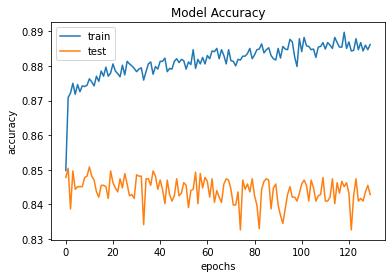

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train",'test'],loc='upper left')
plt.show()

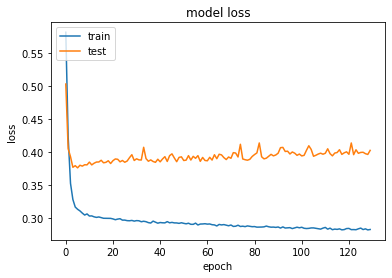

In [40]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)

[[1490  105]
 [ 207  198]]
0.844
